In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x, y = dataset.Level.values.reshape(len(dataset), 1).astype(float), dataset.Salary.values.reshape(len(dataset), 1).astype(float)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler()
scalery = StandardScaler()

x = scalerx.fit_transform(x)
y = scalery.fit_transform(y)
y = y.flat

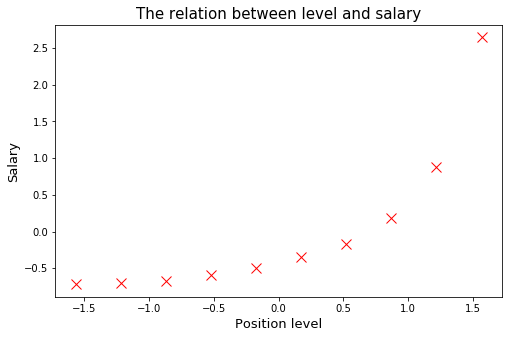

In [5]:
plt.figure(figsize = (8, 5))

plt.title("The relation between level and salary", fontsize = 15)
plt.xlabel("Position level", fontsize = 13)
plt.ylabel("Salary", fontsize = 13)

plt.plot(
    x, y,
    marker = 'x',
    markersize = 10,
    color = "red",
    linestyle = '',
)

In [6]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x, y)

ypredicted = regressor.predict(x)
print("The Accuracy = {0:0.2f}%".format(regressor.score(x, y) * 100))

The Accuracy = 75.16%


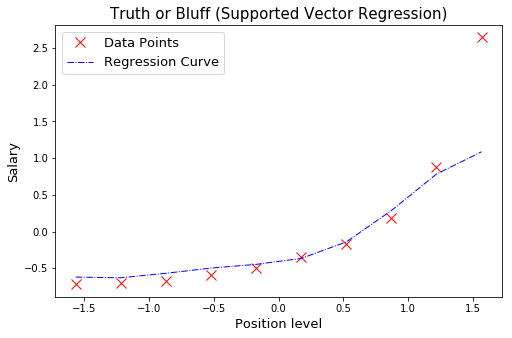

In [7]:
# Visualising the SVR results
plt.figure(figsize = (8, 5))

plt.xlabel("Position level", fontsize = 13)
plt.ylabel("Salary", fontsize = 13)
plt.title("Truth or Bluff (Supported Vector Regression)", fontsize = 15)

plt.plot(
    x, y,
    marker = 'x',
    markersize = 10,
    linestyle = '',
    color = "red",
    label = "Data Points"
)

plt.plot(
    x, ypredicted,
    linestyle = '-.',
    color = "blue",
    linewidth = 1,
    label = "Regression Curve"
)

plt.legend(fontsize = 13)